# Customer booking data

### Loading and inspecting
Import the necessary packages


In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

Load the customer_booking data in a DataFrame named `bookings` and show the first 5 rows to inspect the DataFrame.

In [2]:
filepath="customer_booking.csv"
bookings=pd.read_csv(filepath,index_col=0)
bookings.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


**Information about the dataframe**
  
  
This dataset contains information about airline bookings, including the number of passengers, sales channel, trip type, purchase lead time, length of stay, flight hour, flight day, route, booking origin, and various flags indicating if the customer wanted extra baggage, preferred seat, or in-flight meals. The dataset also includes the total flight duration and a flag indicating if the booking was completed. This information can be used for various analyses, such as predicting demand, identifying popular routes, and understanding customer preferences.

**Column Description**:
* num_passengers = number of passengers travelling
* sales_channel = sales channel booking was made on
* trip_type = trip Type (Round Trip, One Way, Circle Trip)
* purchase_lead = number of days between travel date and booking date
* length_of_stay = number of days spent at destination
* flight_hour = hour of flight departure
* flight_day = day of week of flight departure
* route = origin -> destination flight route
* booking_origin = country from where booking was made
* wants_extra_baggage = if the customer wanted extra baggage in the booking
* wants_preferred_seat = if the customer wanted a preferred seat in the booking
* wants_in_flight_meals = if the customer wanted in-flight meals in the booking
* flight_duration = total duration of flight (in hours)
* booking_complete = flag indicating if the customer completed the booking

### Completed bookings

Create a new dataframe named `completed_bookings`:
* only containing following columns:  
num_passengers, purchase_lead, length_of_stay, booking_origin, flight_duration and booking_complete
* with only the rows where the booking is completed (1)


In [3]:
completed_bookings=bookings[["num_passengers","purchase_lead","length_of_stay","booking_origin","flight_duration","booking_complete"]]
completed_bookings=completed_bookings[completed_bookings["booking_complete"]==1]
completed_bookings.head()

,num_passengers,purchase_lead,length_of_stay,booking_origin,flight_duration,booking_complete
82,1,15,31,Malaysia,8.83,1
86,1,156,19,Malaysia,8.83,1
94,1,181,87,Singapore,8.83,1
109,1,127,17,Malaysia,8.83,1
122,1,42,17,Malaysia,8.83,1


#### Average purchase lead

Group the average days between booking date and traveling date per country of the booking. Display the countries with the lowest average of days between booking and traveling first and the ones with the most days last.

In [4]:
grouped_bookings=completed_bookings.groupby("booking_origin")["purchase_lead"].mean().sort_values()
grouped_bookings.head()

booking_origin
Czech Republic     3.0
Vanuatu           11.0
Sweden            12.6
Bahrain           16.0
Greece            16.0
Name: purchase_lead, dtype: float64

Display the average amount of days between booking date and flight date of Australia.

In [5]:
aus_bookings=grouped_bookings.loc["Australia"]
aus_bookings

np.float64(59.986666666666665)

## Purchase lead histogram
Make a histogram (bar plot) of the purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.

**step 1** find the 5 countries with the most bookings and store them in a variable `countries`.

In [6]:
countries = completed_bookings['booking_origin'].value_counts().head(5).index
countries

Index(['Malaysia', 'Australia', 'China', 'Indonesia', 'Japan'], dtype='object', name='booking_origin')

**step 2** Create a barplot for every country. Ensure you use appropriate labels and a legend.

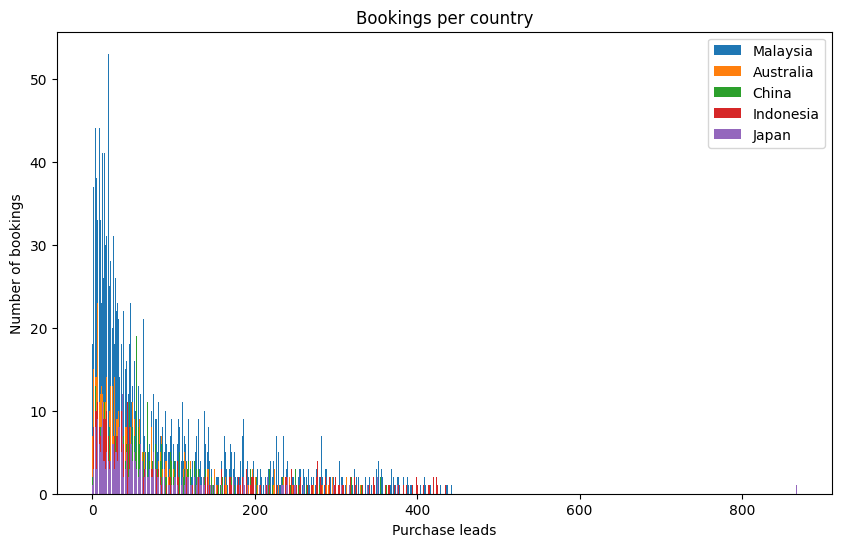

In [7]:
plt.figure(figsize=(10,6))
bar_width=0.4
for country in countries:
    counts=completed_bookings[completed_bookings["booking_origin"]==country]["purchase_lead"].value_counts()
    plt.bar(counts.index,counts,label=country)
plt.title("Bookings per country")
plt.xlabel("Purchase leads")
plt.ylabel("Number of bookings")
# plt.xticks([i + bar_width / 2 for i in counts], completed_bookings['booking_origin'])
plt.legend()
plt.show()

The graph above is not really practical. First of all,  all the bins are very small so it is hard to read. Besides, bars with the same x-value are drawn on top of each other. This causes some bars to be invisible. Furthermore, we have a wide x-axis range with just a few data points above 500.
Let's try to make a cleaner graph.

## Try again
**Assignment**
Make a new histogram (bar plot) of the categorical purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads categories on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.
### Categorizing purchase leads

Let's first categorize the purchase leads using following categories:
purchase lead
* more than 365 days before departure --> early bird
* 365 days or less in advance but more than 183 days in advance --> planner
* Booked more than 90 days prior to departure but at most 183 prior to departure --> seasonal booker
* Booked at most 90 days in advance --> late booker
* less than 2 weeks in advance --> last minute


In [8]:
conditions = [
    completed_bookings['purchase_lead'] > 365,
    (completed_bookings['purchase_lead'] > 183) & (completed_bookings['purchase_lead'] <= 365),
    (completed_bookings['purchase_lead'] > 90) & (completed_bookings['purchase_lead'] <= 183),
    (completed_bookings['purchase_lead'] > 14) & (completed_bookings['purchase_lead'] <= 90),
    completed_bookings['purchase_lead'] <= 14
]

choices = ['early bird', 'planner', 'seasonal booker', 'late booker', 'last minute']


Add a new column "purchase_lead_category" in the completed_bookings dataframe containing the corresponding categories.

In [9]:
completed_bookings['purchase_lead_category'] = np.select(conditions, choices, default='Unknown')
completed_bookings.head()

,num_passengers,purchase_lead,length_of_stay,booking_origin,flight_duration,booking_complete,purchase_lead_category
82,1,15,31,Malaysia,8.83,1,late booker
86,1,156,19,Malaysia,8.83,1,seasonal booker
94,1,181,87,Singapore,8.83,1,seasonal booker
109,1,127,17,Malaysia,8.83,1,seasonal booker
122,1,42,17,Malaysia,8.83,1,late booker


Store the distinct categories in a variable named `pl_categories`, ordered from "last minute" to "early bird".

In [10]:
pl_categories = ['early bird', 'planner', 'seasonal booker', 'late booker', 'last minute']

### Distinct dataframe top 5 
Create a new dataframe `top_df` containing the data of the top 5 countries with the most bookings.

Tip: use the variable `countries`which you already made.

In [11]:
top_df=completed_bookings[completed_bookings["booking_origin"].isin(countries)]
top_df

,num_passengers,purchase_lead,length_of_stay,booking_origin,flight_duration,booking_complete,purchase_lead_category
82,1,15,31,Malaysia,8.83,1,late booker
86,1,156,19,Malaysia,8.83,1,seasonal booker
109,1,127,17,Malaysia,8.83,1,seasonal booker
122,1,42,17,Malaysia,8.83,1,late booker
124,1,22,180,Malaysia,8.83,1,late booker
...,...,...,...,...,...,...,...
49971,2,38,6,Malaysia,4.67,1,late booker
49977,2,15,6,Malaysia,4.67,1,late booker
49980,4,242,6,Malaysia,5.00,1,planner
49984,2,7,6,Australia,5.62,1,last minute


Display the total amount of purchase leads in every purchase_lead_category per country. Store this in a variable.

In [12]:
total=top_df.groupby("purchase_lead_category")[e].mean()
total

NameError: name 'e' is not defined

### Grouped bar plot
We want to display the data for every country using grouped bar charts. In order to evenly display the bars, we have to set the locations of our bars.



Now it is time for you to draw the plot. Keep in mind
* Bars cannot overlap
* The order of countries is preserved (meaning the order of countries is the same for all categories)
* The order of the x value categories should be the same as the order stored in the list `pl_categories`
* Ensure the counts per country are plotted in the right category (the order on the x-axis might not be the same as the order in your dataset)
* Provide labels and a legend
* Rotate the x-axis labels to make them readable

The image `PurchaseLeadCat_top5.png` displays the expected plot.

## Bookings

For the questions below, work with the `bookings` dataframe.

* Remove bookings with missing values
* Create a new column `duration_cat` indicating whether a flight is "Short", "Medium" or "Long" distance. Short distance flights take at most 3 hours, long distance flights take more than 6 hours.
* Create a new column `premium_customer`. A customer is a premium customer if they want extra baggage, preferred seating and in-flight meals. 


* Display summary statistics
* What percentage of bookings are completed vs incomplete?
* Which sales channel has the highest percentage of completion?
* What percentage of long distance travellers who completed their booking are premium customers? (You do not need to take into account the amount of travellers per booking.)
* What are the top 5 most popular routes based on the number of passengers?
* Display the average flight duration per country

In [ ]:
# Summary statistics

In [ ]:
# Percentage completed vs incomplete

In [ ]:
# Percentage of completion per sales channel

In [ ]:
# Premium customers long distance

In [ ]:
# Top 5 routes

In [ ]:
# Flight duration